In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# notice we are adding two new imports for visualizations; This was not here last class
from itertools import product
from pandas_profiling import ProfileReport

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'


sns.set()

In [2]:
df = pd.read_csv('C:/Users/vasco/OneDrive/Ambiente de Trabalho/Mestrado - Data Science/Data Mining/donors.csv')

C:\Users\vasco\anaconda3\envs\DM\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(10)

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A
5,5,2014-01-01,CWR,0,AL,35603,,,NaN,0,...,12.750000,47784,0,L,1,F,X,X,X,C
6,6,2007-01-01,DRK,0,IN,46755,,,1980-01-01,0,...,7.642857,62117,1,L,1,E,X,X,X,D
7,7,2014-01-01,NWN,0,LA,70611,,,NaN,0,...,6.200000,109359,1,L,3,E,X,X,X,C
8,8,2008-01-01,LIS,1,IA,51033,,,NaN,0,...,18.090909,75768,1,L,1,F,X,X,X,D
9,9,2014-01-01,MSD,1,TN,37127-,,,1952-11-01,0,...,9.333333,49909,0,L,1,F,X,X,X,B


In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
# dataset data types
df.dtypes

ODATEDW      object
OSOURCE      object
TCODE         int64
STATE        object
ZIP          object
MAILCODE     object
PVASTATE     object
DOB          object
NOEXCH       object
RECINHSE     object
RECP3        object
RECPGVG      object
RECSWEEP     object
MDMAUD       object
DOMAIN       object
HOMEOWNR     object
CHILD03      object
CHILD07      object
CHILD12      object
CHILD18      object
NUMCHLD     float64
INCOME      float64
GENDER       object
WEALTH1     float64
HIT           int64
MBCRAFT     float64
MBGARDEN    float64
MBBOOKS     float64
MBCOLECT    float64
MAGFAML     float64
MAGFEM      float64
MAGMALE     float64
PUBGARDN    float64
PUBCULIN    float64
PUBHLTH     float64
PUBDOITY    float64
PUBNEWFN    float64
PUBPHOTO    float64
PUBOPP      float64
DATASRCE     object
MALEMILI      int64
MALEVET       int64
VIETVETS      int64
WWIIVETS      int64
LOCALGOV      int64
STATEGOV      int64
FEDGOV        int64
SOLP3        object
SOLIH        object
MAJOR        object


In [7]:
# count of missing values
df.isna().sum()

ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE        0
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN          0
HOMEOWNR        0
CHILD03         0
CHILD07         0
CHILD12         0
CHILD18         0
NUMCHLD     83026
INCOME      21286
GENDER          0
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE        0
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3           0
SOLIH           0
MAJOR           0
WEALTH2     43823
GEOCODE         0
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

In [8]:
# duplicated observations
df.duplicated().sum()

0

In [9]:
# descriptive statistics
df.describe(include="all").T  # try with all and without all

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ODATEDW,95412,54,2015-01-01,15358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OSOURCE,95412,896,MBC,4539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCODE,95412,NaN,NaN,NaN,54.2231,953.844,0,0,1,2,72002
STATE,95412,57,CA,17343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP,95412,19938,85351,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAILCODE,95412,2,,94013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PVASTATE,95412,3,,93954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOB,71529,847,1968-01-01,1479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOEXCH,95412,6,0,61203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RECINHSE,95412,2,,88709,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.TCODE = df.TCODE.astype(object)
df['DOB'] = pd.to_datetime(df['DOB'])
df['ODATEDW'] = pd.to_datetime(df['ODATEDW'])

In [11]:
# check data types again
df.dtypes

ODATEDW     datetime64[ns]
OSOURCE             object
TCODE               object
STATE               object
ZIP                 object
MAILCODE            object
PVASTATE            object
DOB         datetime64[ns]
NOEXCH              object
RECINHSE            object
RECP3               object
RECPGVG             object
RECSWEEP            object
MDMAUD              object
DOMAIN              object
HOMEOWNR            object
CHILD03             object
CHILD07             object
CHILD12             object
CHILD18             object
NUMCHLD            float64
INCOME             float64
GENDER              object
WEALTH1            float64
HIT                  int64
MBCRAFT            float64
MBGARDEN           float64
MBBOOKS            float64
MBCOLECT           float64
MAGFAML            float64
MAGFEM             float64
MAGMALE            float64
PUBGARDN           float64
PUBCULIN           float64
PUBHLTH            float64
PUBDOITY           float64
PUBNEWFN           float64
P

In [12]:
# check descriptive statistics again
df.describe(include="all").T

<ipython-input-12-4f0fb0f0c755>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all").T
<ipython-input-12-4f0fb0f0c755>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ODATEDW,95412,54,2015-01-01 00:00:00,15358,2003-06-01,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OSOURCE,95412,896,MBC,4539,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCODE,95412,55,0,40917,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATE,95412,57,CA,17343,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP,95412,19938,85351,61,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAILCODE,95412,2,,94013,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PVASTATE,95412,3,,93954,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOB,71529,847,1968-01-01 00:00:00,1479,1930-01-01,2017-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOEXCH,95412,6,0,61203,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RECINHSE,95412,2,,88709,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
non_metric = df.loc[:,(np.array(df.dtypes=="object"))]
metric= df.columns.drop(non_metric).to_list()

In [18]:
non_metric.columns

Index(['OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'NOEXCH',
       'RECINHSE', 'RECP3', 'RECPGVG',
       ...
       'MAXRDATE', 'LASTDATE', 'FISTDATE', 'NEXTDATE', 'RFA_2R', 'RFA_2A',
       'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object', length=124)

In [ ]:
non_metric.drop(columns = )

## Correlation

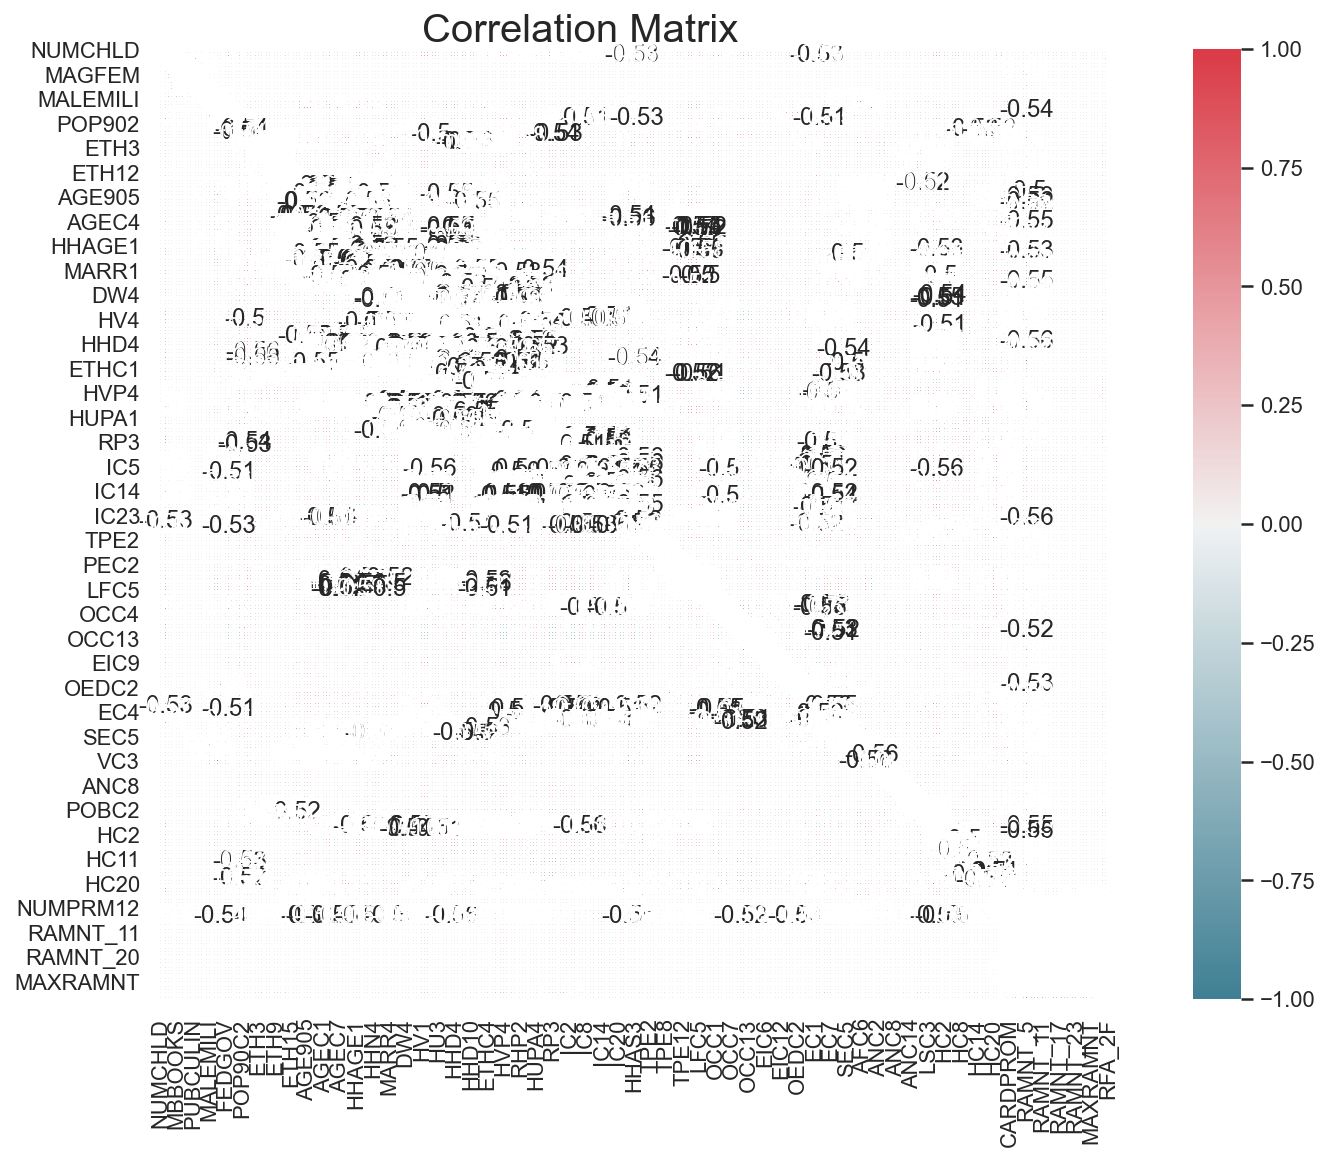

In [14]:
fig = plt.figure(figsize=(15, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [15]:
profile = ProfileReport(
    df, 
    title='Tugas Customer Data',
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },
)

In [17]:
profile.to_notebook_iframe()

KeyboardInterrupt: 